In [1]:
# Test should run from root
import os
from os.path import join
from pathlib import Path
import numpy as np
from omegaconf import OmegaConf
import rasterio
from rasterio.plot import show
from multiearth.api import extract_assets
from multiearth.config import ConfigSchema

import matplotlib.pyplot as plt
import xarray as xr

os.chdir("..")

/anaconda3/envs/metaearth/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cfg = OmegaConf.load("config/gridmet.yaml")
cfg_schema = OmegaConf.structured(ConfigSchema)
cfg = OmegaConf.merge(cfg_schema, cfg)

In [3]:
# Constrain the test to only pull one item and one band
for pvdr in cfg.providers:
    for coll in pvdr.collections:
        coll.max_items = 1
        coll.assets = ["air_temperature"]

success = extract_assets(cfg)
print("Successfully extracted assets." if success else "Asset extraction failed.")

18:11:01 INFO - Extraction details for provider ProviderKey.XARR_MPC with collection gridmet: 
id: gridmet
assets:
- air_temperature
outdir: data/demo-extraction
datetime: null
aoi_file: null
max_items: 1



collection.assets ['air_temperature'] <class 'omegaconf.listconfig.ListConfig'>
beginning download
info
xarray.Dataset {
dimensions:
	time = 2 ;
	lat = 21 ;
	lon = 28 ;

variables:
	float32 air_temperature(time, lat, lon) ;
		air_temperature:coordinate_system = WGS84,EPSG:4326 ;
		air_temperature:description = Daily Minimum Temperature ;
		air_temperature:dimensions = lon lat time ;
		air_temperature:grid_mapping = crs ;
		air_temperature:long_name = tmmn ;
		air_temperature:standard_name = tmmn ;
		air_temperature:units = K ;
	float64 lat(lat) ;
		lat:axis = Y ;
		lat:description = latitude ;
		lat:long_name = latitude ;
		lat:standard_name = latitude ;
		lat:units = degrees_north ;
	float64 lon(lon) ;
		lon:axis = X ;
		lon:description = longitude ;
		lon:long_name = longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
	datetime64[ns] time(time) ;
		time:description = days since 1900-01-01 ;
		time:long_name = time ;
		time:standard_name = time ;

// global attr

In [4]:
fpath = Path(cfg["default_collection"]["outdir"])
ds_disk = xr.open_dataset(join(fpath, "result.nc"))

In [5]:
ds_disk

<xarray.Dataset>
Dimensions:          (time: 2, lat: 21, lon: 28)
Coordinates:
  * lat              (lat) float64 38.23 38.19 38.15 38.11 ... 37.48 37.44 37.4
  * lon              (lon) float64 -120.1 -120.1 -120.0 ... -119.1 -119.0 -119.0
  * time             (time) datetime64[ns] 2019-06-01 2019-06-02
Data variables:
    air_temperature  (time, lat, lon) float32 ...
Attributes: (12/19)
    Conventions:                CF-1.6
    author:                     John Abatzoglou - University of Idaho, jabatz...
    coordinate_system:          EPSG:4326
    date:                       02 July 2019
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_bounds_crs:      EPSG:4326
    ...                         ...
    geospatial_lon_units:       decimal_degrees east
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [8]:
mask = np.load(join(fpath, "aoi_mask.npy"))

SyntaxError: EOL while scanning string literal (3076092082.py, line 1)

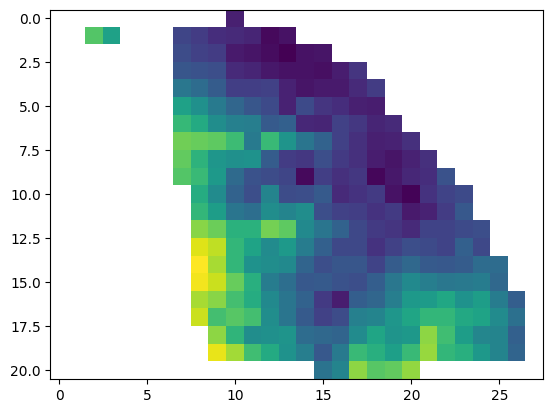

In [7]:
plt.imshow(ds_disk["air_temperature"][0]*mask)